**Final Project (29cm)** 
# 데이터 전처리 및 탐색

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_column', 1000)
pd.options.display.float_format = '{:.2f}'.format

import random
from tqdm.autonotebook import tqdm
import string
import re
plt.rcParams['font.family'] = 'AppleGothic' # 폰트 변경
plt.rcParams['axes.unicode_minus'] = False # 축 값 마이너스 깨짐 해결

## 파일 불러오기

In [2]:
events = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_events.csv")
products = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_products.csv")
users = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/commerce/sampled_users.csv")

In [ ]:
ad = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/ad.csv")
advertiser = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/advertiser.csv")
dataset = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/dataset.csv")
impression_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/impression_log.csv")
view_log = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/view_log.csv")
viewer = pd.read_csv("/Users/greedy/Downloads/패스트캠퍼스/파이널/data/data/viewer.csv")

## 데이터 살펴보기

In [ ]:
events.head()

In [110]:
events.describe()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform
count,5880407,5880407,5880407,5880407,5880407,5880407,5876813,5876813,1629466,5880407,5880395,5878212,5880407
unique,1425915,5830374,4,254958,283326,2,19,475,229,80,59,197,2
top,e66c96573506e70fc41cd9eef8327547,2021-06-22 10:07:05.720234,click_item,b2xZVfUtjyGsZckO7j6zkg==,Q0FgPI5gYPwi7sDRXYc2MA==,mobile,Apple,iPhone,Galaxy Note10 5G,iOS 14.6,South Korea,Seoul,IOS
freq,933,7,4845691,7858,8836,5853335,4241405,2680251,121521,2908354,5863296,2897803,4241406


In [ ]:
events.info()

In [ ]:
events.isnull().sum()

In [ ]:
products.head()

In [111]:
products.describe()

,price,category1_code,category2_code,category3_code,brand_no
count,283326.00,283326.00,283326.00,283326.00,283323.00
mean,122139.69,244839227.37,244831694.77,244831674.25,7903.39
std,238087.56,2661239.03,2637422.36,2637472.21,4049.18
min,0.00,234100100.00,234105100.00,234105104.00,441.00
25%,36000.00,243100100.00,243102100.00,243102106.00,4288.00
50%,69000.00,244100100.00,244101100.00,244101112.00,7899.00
75%,139000.00,244100100.00,244110100.00,244110101.00,11354.00
max,14298000.00,267100100.00,259103100.00,259103106.00,15737.00


In [ ]:
products.info()

In [ ]:
users.head()

In [112]:
users.describe()

,user_no,birth_date,gender
count,254958,231282,214010
unique,254958,16325,2
top,++MXKfwkOw4VFn9HkVCRrw==,1990-02-28,F
freq,1,85,163130


In [ ]:
users.info()

## 데이터 users, products를 events에 병합

In [3]:
df = pd.merge(events, products, how = 'outer', on = 'item_no')

In [4]:
df = pd.merge(df, users, how = 'outer', on = 'user_no')

In [116]:
df['item_no'].drop_duplicates()

0          4KwsZkXDulM0oQ2sTVSlYQ==
1          seELIO8ssL85o/yMQpkKNw==
2          AQNsEUBqxMy99Mk6odfWTA==
3          DfYgpxfLCWwF+gyEmAjGkA==
4          1/60mbjEzf3sI/52/d9lQA==
                     ...           
5880401    x7MXyerH7I+4M4S0oYQAcg==
5880403    qNorOBfo2czGjl4BXZm2DA==
5880404    UeNmYupxs3xDW9lvaq8C1Q==
5880405    Vdp7vFLXgmbTzC09SxXhFg==
5880406    DvPReUTdyc5nKRdH0kUAVw==
Name: item_no, Length: 283326, dtype: object

In [114]:
df['user_no'].drop_duplicates()

0          +9eODQMZ8YgXQZJJAo56nw==
34         l1wFRhb3av5rTWyYEofrIA==
50         Y5GM63HPuFwrRnvYhDu7sQ==
63         ryHs/qZ/8bZNC7h+QIQWqw==
91         A9W2xpcfcm61jkeVUBFxxA==
                     ...           
5880402    8okJXtYVKYoBoBAG823v2Q==
5880403    Ve1mEjXwrBP8YHdtNyHKxQ==
5880404    vrE4nCVISqKLZ59f+eGRfA==
5880405    IRWUNThkMgQZobEJm8OG1w==
5880406    5rVv6fkSkHKnK/u8yTiIwQ==
Name: user_no, Length: 254958, dtype: object

In [11]:
df.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
1,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:47.511013,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 이지 쇼츠,13551f740ecacbcce3baf5e232f0fb9b,19900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
2,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:21.636026,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 치노 밴딩 팬츠,569712813f195e07974c740aeb70f7b2,39900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
3,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:58.306042,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 쿨터치 사이드밴드 슬랙스,54df4e65f4b1dfe66273203fbd3c8d23,49900.00,243100100,의류,243102100,상의,243102103,티셔츠,13901.00,TOPTEN,1969-04-05,F
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,2021-06-10 12:15:42.476001,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,[Laslow] SeasonUnit Sigma F (남여공용),3cd917571a5f2a26eb01587d0276227a,65000.00,244100100,잡화,244101100,신발,244101112,슬리퍼,11481.00,LASLOW,1969-04-05,F


In [105]:
df.describe()

,price,category1_code,category2_code,category3_code,brand_no
count,5880407.00,5880407.00,5880407.00,5880407.00,5880236.00
mean,94651.86,244233318.67,244202638.06,244202639.54,7254.33
std,116924.85,2390333.62,2278878.04,2278883.72,4307.78
min,0.00,234100100.00,234105100.00,234105104.00,441.00
25%,39700.00,243100100.00,243102100.00,243102105.00,3268.00
50%,69000.00,243100100.00,243104100.00,243104102.00,6513.00
75%,119000.00,244100100.00,244102100.00,244102108.00,11359.00
max,14298000.00,267100100.00,259103100.00,259103106.00,15737.00


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.columns

## 전처리

In [ ]:
import missingno
plt.figure(figsize=(20, 8))
missingno.matrix(df)

In [ ]:
df[df['brand_no'].isnull()]['category3_name']

In [ ]:
df[df['brand_name'].isnull()]

**브랜드 네임 없는 경우 대부분 홑이불**

In [ ]:
#2017년생 구매 데이터

### Users 생년월일 --> 날짜데이터, Null값 처리


In [5]:
df['birth_date'] = pd.to_datetime(df['birth_date'], errors = 'coerce')

In [ ]:
type(df['birth_date'][0])

In [ ]:
df['birth_date'].isnull().sum()

In [6]:
def convert_datetime(row):
    if pd.isnull(row):
        return np.nan
    else:
        return pd.to_datetime(row)

In [7]:
df['birth_date'] = df['birth_date'].apply(convert_datetime)

In [ ]:
df['birth_date'].describe()

In [ ]:
df_year = df['birth_date'].dt.year

In [ ]:
df_year.max()

In [ ]:
x = df_year.unique()
x

In [ ]:
plt.figure(figsize=(20, 7))
a = df_year.plot(kind='hist')
a.get_xaxis().get_major_formatter().set_scientific(False)
plt.grid(color='lightgrey', alpha=0.5)
plt.xticks(np.arange(1923,2017))
plt.show()

### Users 성별

In [ ]:
df['gender'].value_counts()

여성 회원 다수

## 데이터 EDA

### Products 카테고리

In [ ]:
df_category = df.groupby(['category1_name'])['session_id'].count().sort_values(ascending=False).\
reset_index()

#비중
for i in range(len(df_category)):
    df_category['비중'] = df_category['session_id']/df_category['session_id'].sum() * 100

df_category

In [ ]:
colors = sns.color_palette('hls', len(df_category['category1_name'])) 

fig = plt.figure(figsize=(10, 10)) 
fig.set_facecolor('white') 
ax = fig.add_subplot() 
 
pie = ax.pie(df_category['비중'], ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), 
       colors = colors
       )
plt.title('카테고리 비중', fontsize=14)
plt.legend(pie[0], df_category['category1_name']) 

In [ ]:
df1 = df.groupby('category1_name')['session_id'].count()
df1

In [ ]:
df3['session_id']

In [ ]:
df3 = df2[df['event_name']=='purchase_success'].set_index('category1_name')
for i in range(len(df3)):
    df3['세션 당 구매율'] = df3['session_id']/df1
df3

In [ ]:
#유저 당 구매율
#유저 한 명이 본 상품 수
#유저 당 구매이벤트 / 총 이벤트 수
df.groupby('user_no')['events_name'].
df.groupby('user_no').sum()

### 코호트 분석

In [39]:
#https://workingwithpython.com/pythoncohortanalysis/

In [8]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])
df.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845000,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
1,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:47.511013,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 이지 쇼츠,13551f740ecacbcce3baf5e232f0fb9b,19900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
2,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:21.636026,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 치노 밴딩 팬츠,569712813f195e07974c740aeb70f7b2,39900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
3,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:58.306042,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 쿨터치 사이드밴드 슬랙스,54df4e65f4b1dfe66273203fbd3c8d23,49900.00,243100100,의류,243102100,상의,243102103,티셔츠,13901.00,TOPTEN,1969-04-05,F
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,2021-06-10 12:15:42.476001,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,[Laslow] SeasonUnit Sigma F (남여공용),3cd917571a5f2a26eb01587d0276227a,65000.00,244100100,잡화,244101100,신발,244101112,슬리퍼,11481.00,LASLOW,1969-04-05,F


In [36]:
df['event_timestamp'] = df['event_timestamp'].dt.strftime('%y/%m/%d')

In [37]:
df.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,03/06/21,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
1,c47e93742387750baba2e238558fa12d,03/06/21,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 이지 쇼츠,13551f740ecacbcce3baf5e232f0fb9b,19900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
2,c47e93742387750baba2e238558fa12d,03/06/21,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 치노 밴딩 팬츠,569712813f195e07974c740aeb70f7b2,39900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
3,c47e93742387750baba2e238558fa12d,03/06/21,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 쿨터치 사이드밴드 슬랙스,54df4e65f4b1dfe66273203fbd3c8d23,49900.00,243100100,의류,243102100,상의,243102103,티셔츠,13901.00,TOPTEN,1969-04-05,F
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,10/06/21,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,[Laslow] SeasonUnit Sigma F (남여공용),3cd917571a5f2a26eb01587d0276227a,65000.00,244100100,잡화,244101100,신발,244101112,슬리퍼,11481.00,LASLOW,1969-04-05,F


In [13]:
#유저 - 세션 - 타임스탬프 - 이벤트 네임 
CH = df[['user_no', 'session_id', 'event_timestamp', 'event_name']]
CH.head()

,user_no,session_id,event_timestamp,event_name
0,+9eODQMZ8YgXQZJJAo56nw==,c47e93742387750baba2e238558fa12d,21/06/03,click_item
1,+9eODQMZ8YgXQZJJAo56nw==,c47e93742387750baba2e238558fa12d,21/06/03,click_item
2,+9eODQMZ8YgXQZJJAo56nw==,c47e93742387750baba2e238558fa12d,21/06/03,click_item
3,+9eODQMZ8YgXQZJJAo56nw==,c47e93742387750baba2e238558fa12d,21/06/03,click_item
4,+9eODQMZ8YgXQZJJAo56nw==,f1b035b71ef5f8e1e7c1d6c0c5032faa,21/06/10,add_to_cart


In [14]:
FirstSession = CH.groupby('user_no')['event_timestamp'].min()
FirstSession.head()

user_no
+++T9c17sr6wEYOy9UFv3w==    21/06/15
+++aQH5NnhiU/9qECKk3uQ==    21/06/10
++0bwiYVJ/TAsCpxI4UCuw==    21/06/14
++1HN9s1imztN8ftPCt3LA==    21/06/10
++292nTvV+bCI1Diuw96GA==    21/07/08
Name: event_timestamp, dtype: object

In [15]:
FirstSession

user_no
+++T9c17sr6wEYOy9UFv3w==    21/06/15
+++aQH5NnhiU/9qECKk3uQ==    21/06/10
++0bwiYVJ/TAsCpxI4UCuw==    21/06/14
++1HN9s1imztN8ftPCt3LA==    21/06/10
++292nTvV+bCI1Diuw96GA==    21/07/08
                              ...   
zzwYai1YDr0JZQwaTqc0mQ==    21/07/04
zzwxh/ZL9TPJOWZHLMvnDQ==    21/06/30
zzxlG1wzPCGvsW0SlOleDg==    21/07/04
zzzTNW8escss3zrnpuGMhQ==    21/07/07
zzzWx+6Z3L2IRJBTgvBs5g==    21/06/15
Name: event_timestamp, Length: 254958, dtype: object

In [16]:
CH.set_index('user_no', inplace = True)

In [17]:
CH['FirstSession']=FirstSession

In [18]:
CH.reset_index(inplace = True)

In [19]:
grouped = CH.groupby(['FirstSession', 'event_timestamp'])

In [20]:
CH1 = grouped['user_no'].nunique()
CH1.head(10)

FirstSession  event_timestamp
21/06/03      21/06/03           11873
              21/06/04            3167
              21/06/05            2723
              21/06/06            2898
              21/06/07            3038
              21/06/08            2829
              21/06/09            2945
              21/06/10            2763
              21/06/11            2380
              21/06/12            2276
Name: user_no, dtype: int64

In [21]:
CH1.reset_index()

,FirstSession,event_timestamp,user_no
0,21/06/03,21/06/03,11873
1,21/06/03,21/06/04,3167
2,21/06/03,21/06/05,2723
3,21/06/03,21/06/06,2898
4,21/06/03,21/06/07,3038
...,...,...,...
2011,21/08/02,21/08/03,191
2012,21/08/02,21/08/04,59
2013,21/08/03,21/08/03,1822
2014,21/08/03,21/08/04,116


In [22]:
CH1.rename({'user_no':'TotalUsers'},axis=1,inplace=True)
CH1 = CH1.reset_index()

In [23]:
CH1

,FirstSession,event_timestamp,user_no
0,21/06/03,21/06/03,11873
1,21/06/03,21/06/04,3167
2,21/06/03,21/06/05,2723
3,21/06/03,21/06/06,2898
4,21/06/03,21/06/07,3038
...,...,...,...
2011,21/08/02,21/08/03,191
2012,21/08/02,21/08/04,59
2013,21/08/03,21/08/03,1822
2014,21/08/03,21/08/04,116


In [24]:
each_period=CH1['FirstSession'].value_counts().sort_index()
each_period

21/06/03    63
21/06/04    62
21/06/05    61
21/06/06    60
21/06/07    59
21/06/08    58
21/06/09    57
21/06/10    56
21/06/11    55
21/06/12    54
21/06/13    53
21/06/14    52
21/06/15    51
21/06/16    50
21/06/17    49
21/06/18    48
21/06/19    47
21/06/20    46
21/06/21    45
21/06/22    44
21/06/23    43
21/06/24    42
21/06/25    41
21/06/26    40
21/06/27    39
21/06/28    38
21/06/29    37
21/06/30    36
21/07/01    35
21/07/02    34
21/07/03    33
21/07/04    32
21/07/05    31
21/07/06    30
21/07/07    29
21/07/08    28
21/07/09    27
21/07/10    26
21/07/11    25
21/07/12    24
21/07/13    23
21/07/14    22
21/07/15    21
21/07/16    20
21/07/17    19
21/07/18    18
21/07/19    17
21/07/20    16
21/07/21    15
21/07/22    14
21/07/23    13
21/07/24    12
21/07/25    11
21/07/26    10
21/07/27     9
21/07/28     8
21/07/29     7
21/07/30     6
21/07/31     5
21/08/01     4
21/08/02     3
21/08/03     2
21/08/04     1
Name: FirstSession, dtype: int64

In [25]:
cohortperiod=[]

for x in each_period: 
    for y in range(x):
        cohortperiod.append(y)

In [26]:
CH1['CohortPeriod']=cohortperiod
CH1.head(20)

,FirstSession,event_timestamp,user_no,CohortPeriod
0,21/06/03,21/06/03,11873,0
1,21/06/03,21/06/04,3167,1
2,21/06/03,21/06/05,2723,2
3,21/06/03,21/06/06,2898,3
4,21/06/03,21/06/07,3038,4
5,21/06/03,21/06/08,2829,5
6,21/06/03,21/06/09,2945,6
7,21/06/03,21/06/10,2763,7
8,21/06/03,21/06/11,2380,8
9,21/06/03,21/06/12,2276,9


In [27]:
CH1.set_index(['FirstSession','CohortPeriod'],inplace=True)
CH1.head()

event_timestamp  user_no
FirstSession CohortPeriod                         
21/06/03     0                   21/06/03    11873
             1                   21/06/04     3167
             2                   21/06/05     2723
             3                   21/06/06     2898
             4                   21/06/07     3038

In [28]:
CH1=CH1['user_no'].unstack(1)
CH1

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
FirstSession,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21/06/03,11873.00,3167.00,2723.00,2898.00,3038.00,2829.00,2945.00,2763.00,2380.00,2276.00,1151.00,1830.00,2544.00,2553.00,2305.00,2333.00,2184.00,2349.00,2321.00,2318.00,2409.00,2171.00,2166.00,1969.00,2269.00,2295.00,2270.00,2375.00,2591.00,2321.00,2269.00,2337.00,2206.00,2385.00,2294.00,2053.00,2013.00,2195.00,2466.00,2170.00,2218.00,2302.00,2200.00,2135.00,2080.00,2237.00,2043.00,2082.00,2099.00,1935.00,1954.00,1831.00,1985.00,2029.00,1960.00,2004.00,1814.00,1746.00,1777.00,1946.00,1938.00,1961.00,967.00
21/06/04,12875.00,2722.00,2749.00,2625.00,2609.00,2644.00,2371.00,2195.00,2165.00,1029.00,1483.00,2232.00,2282.00,2030.00,2040.00,1979.00,2184.00,2142.00,1979.00,2085.00,1917.00,1991.00,1870.00,2015.00,2089.00,2019.00,2180.00,2309.00,2030.00,2030.00,2169.00,1974.00,2124.00,2002.00,1880.00,1889.00,1932.00,2288.00,2060.00,1983.00,2057.00,2045.00,1961.00,1800.00,2025.00,1860.00,1885.00,1853.00,1743.00,1770.00,1713.00,1860.00,1789.00,1761.00,1754.00,1649.00,1539.00,1642.00,1820.00,1712.00,1717.00,899.00,NaN
21/06/05,11486.00,2686.00,1997.00,1938.00,1990.00,1810.00,1592.00,1824.00,811.00,1063.00,1626.00,1674.00,1540.00,1496.00,1659.00,1886.00,1535.00,1431.00,1541.00,1388.00,1398.00,1542.00,1696.00,1451.00,1512.00,1539.00,1617.00,1353.00,1670.00,1742.00,1471.00,1513.00,1428.00,1340.00,1319.00,1591.00,1835.00,1454.00,1483.00,1548.00,1458.00,1400.00,1593.00,1650.00,1411.00,1386.00,1353.00,1318.00,1254.00,1377.00,1544.00,1367.00,1352.00,1292.00,1155.00,1123.00,1297.00,1461.00,1328.00,1256.00,637.00,NaN,NaN
21/06/06,12264.00,2200.00,1908.00,1872.00,1673.00,1429.00,1543.00,692.00,1031.00,1498.00,1497.00,1315.00,1252.00,1441.00,1669.00,1401.00,1359.00,1351.00,1216.00,1195.00,1346.00,1535.00,1404.00,1350.00,1390.00,1473.00,1281.00,1426.00,1705.00,1364.00,1439.00,1272.00,1187.00,1177.00,1357.00,1696.00,1337.00,1349.00,1336.00,1283.00,1295.00,1386.00,1520.00,1210.00,1165.00,1217.00,1110.00,1070.00,1127.00,1324.00,1198.00,1157.00,1169.00,1047.00,964.00,1082.00,1335.00,1153.00,1172.00,513.00,NaN,NaN,NaN
21/06/07,9898.00,1716.00,1555.00,1356.00,1082.00,1043.00,489.00,812.00,1219.00,1071.00,1021.00,943.00,947.00,1069.00,1092.00,1019.00,1006.00,899.00,882.00,825.00,982.00,1014.00,1002.00,1022.00,1110.00,953.00,885.00,1093.00,1022.00,1055.00,997.00,902.00,857.00,891.00,1086.00,1003.00,1004.00,1027.00,968.00,918.00,905.00,1055.00,929.00,960.00,932.00,860.00,801.00,750.00,912.00,914.00,937.00,886.00,720.00,700.00,735.00,876.00,830.00,848.00,401.00,NaN,NaN,NaN,NaN
21/06/08,8644.00,1438.00,1158.00,884.00,867.00,400.00,600.00,933.00,925.00,819.00,777.00,729.00,868.00,889.00,796.00,807.00,734.00,641.00,712.00,810.00,825.00,794.00,841.00,876.00,767.00,764.00,821.00,791.00,868.00,778.00,662.00,637.00,728.00,911.00,775.00,809.00,761.00,776.00,680.00,699.00,793.00,712.00,719.00,711.00,700.00,627.00,593.00,663.00,687.00,678.00,640.00,605.00,570.00,570.00,632.00,642.00,663.00,340.00,NaN,NaN,NaN,NaN,NaN
21/06/09,8068.00,1231.00,861.00,770.00,328.00,542.00,877.00,794.00,698.00,715.00,637.00,750.00,717.00,642.00,748.00,636.00,649.00,549.00,656.00,763.00,653.00,712.00,780.00,647.00,628.00,712.00,656.00,726.00,689.00,652.00,624.00,636.00,763.00,677.00,704.00,705.00,688.00,637.00,634.00,659.00,585.00,605.00,674.00,600.00,534.00,529.00,574.00,565.00,645.00,573.00,526.00,497.00,515.00,574.00,551.00,586.00,246.00,NaN,NaN,NaN,NaN,NaN,NaN
21/06/10,7525.00,976.00,710.00,320.00,499.00,692.00,708.00,583.00,551.00,539.00,610.00,617.00,595.00,596.00,550.00,523.00,491.00,569.00,601.00,534.00,578.00,636.00,534.00,535.00,586.00,533.00,599.00,558.00,511.00,493.00,567.00,637.00,582.00,598.00,553.00,585.00,525.00,469.00,588.00,536.00,526.00,510.00,497.00,439.00,404.00,512.00,477.00,507.00,472.00,440.00,414.00,406.0

In [29]:
CH1[0]

FirstSession
21/06/03   11873.00
21/06/04   12875.00
21/06/05   11486.00
21/06/06   12264.00
21/06/07    9898.00
21/06/08    8644.00
21/06/09    8068.00
21/06/10    7525.00
21/06/11    5622.00
21/06/12    5770.00
21/06/13    2441.00
21/06/14    3906.00
21/06/15    6389.00
21/06/16    5264.00
21/06/17    4514.00
21/06/18    3992.00
21/06/19    4097.00
21/06/20    4943.00
21/06/21    4357.00
21/06/22    4003.00
21/06/23    3574.00
21/06/24    3482.00
21/06/25    2965.00
21/06/26    3003.00
21/06/27    3698.00
21/06/28    3580.00
21/06/29    3276.00
21/06/30    3255.00
21/07/01    5290.00
21/07/02    3759.00
21/07/03    3879.00
21/07/04    4602.00
21/07/05    3515.00
21/07/06    3273.00
21/07/07    2843.00
21/07/08    2464.00
21/07/09    2300.00
21/07/10    2789.00
21/07/11    3678.00
21/07/12    2927.00
21/07/13    2967.00
21/07/14    2861.00
21/07/15    2541.00
21/07/16    2311.00
21/07/17    2495.00
21/07/18    2932.00
21/07/19    2559.00
21/07/20    2555.00
21/07/21    2572.00
21/07/2

In [30]:
user_retention=CH1.divide(CH1[0],axis=0)
user_retention

CohortPeriod,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62
FirstSession,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21/06/03,1.00,0.27,0.23,0.24,0.26,0.24,0.25,0.23,0.20,0.19,0.10,0.15,0.21,0.22,0.19,0.20,0.18,0.20,0.20,0.20,0.20,0.18,0.18,0.17,0.19,0.19,0.19,0.20,0.22,0.20,0.19,0.20,0.19,0.20,0.19,0.17,0.17,0.18,0.21,0.18,0.19,0.19,0.19,0.18,0.18,0.19,0.17,0.18,0.18,0.16,0.16,0.15,0.17,0.17,0.17,0.17,0.15,0.15,0.15,0.16,0.16,0.17,0.08
21/06/04,1.00,0.21,0.21,0.20,0.20,0.21,0.18,0.17,0.17,0.08,0.12,0.17,0.18,0.16,0.16,0.15,0.17,0.17,0.15,0.16,0.15,0.15,0.15,0.16,0.16,0.16,0.17,0.18,0.16,0.16,0.17,0.15,0.16,0.16,0.15,0.15,0.15,0.18,0.16,0.15,0.16,0.16,0.15,0.14,0.16,0.14,0.15,0.14,0.14,0.14,0.13,0.14,0.14,0.14,0.14,0.13,0.12,0.13,0.14,0.13,0.13,0.07,NaN
21/06/05,1.00,0.23,0.17,0.17,0.17,0.16,0.14,0.16,0.07,0.09,0.14,0.15,0.13,0.13,0.14,0.16,0.13,0.12,0.13,0.12,0.12,0.13,0.15,0.13,0.13,0.13,0.14,0.12,0.15,0.15,0.13,0.13,0.12,0.12,0.11,0.14,0.16,0.13,0.13,0.13,0.13,0.12,0.14,0.14,0.12,0.12,0.12,0.11,0.11,0.12,0.13,0.12,0.12,0.11,0.10,0.10,0.11,0.13,0.12,0.11,0.06,NaN,NaN
21/06/06,1.00,0.18,0.16,0.15,0.14,0.12,0.13,0.06,0.08,0.12,0.12,0.11,0.10,0.12,0.14,0.11,0.11,0.11,0.10,0.10,0.11,0.13,0.11,0.11,0.11,0.12,0.10,0.12,0.14,0.11,0.12,0.10,0.10,0.10,0.11,0.14,0.11,0.11,0.11,0.10,0.11,0.11,0.12,0.10,0.09,0.10,0.09,0.09,0.09,0.11,0.10,0.09,0.10,0.09,0.08,0.09,0.11,0.09,0.10,0.04,NaN,NaN,NaN
21/06/07,1.00,0.17,0.16,0.14,0.11,0.11,0.05,0.08,0.12,0.11,0.10,0.10,0.10,0.11,0.11,0.10,0.10,0.09,0.09,0.08,0.10,0.10,0.10,0.10,0.11,0.10,0.09,0.11,0.10,0.11,0.10,0.09,0.09,0.09,0.11,0.10,0.10,0.10,0.10,0.09,0.09,0.11,0.09,0.10,0.09,0.09,0.08,0.08,0.09,0.09,0.09,0.09,0.07,0.07,0.07,0.09,0.08,0.09,0.04,NaN,NaN,NaN,NaN
21/06/08,1.00,0.17,0.13,0.10,0.10,0.05,0.07,0.11,0.11,0.09,0.09,0.08,0.10,0.10,0.09,0.09,0.08,0.07,0.08,0.09,0.10,0.09,0.10,0.10,0.09,0.09,0.09,0.09,0.10,0.09,0.08,0.07,0.08,0.11,0.09,0.09,0.09,0.09,0.08,0.08,0.09,0.08,0.08,0.08,0.08,0.07,0.07,0.08,0.08,0.08,0.07,0.07,0.07,0.07,0.07,0.07,0.08,0.04,NaN,NaN,NaN,NaN,NaN
21/06/09,1.00,0.15,0.11,0.10,0.04,0.07,0.11,0.10,0.09,0.09,0.08,0.09,0.09,0.08,0.09,0.08,0.08,0.07,0.08,0.09,0.08,0.09,0.10,0.08,0.08,0.09,0.08,0.09,0.09,0.08,0.08,0.08,0.09,0.08,0.09,0.09,0.09,0.08,0.08,0.08,0.07,0.07,0.08,0.07,0.07,0.07,0.07,0.07,0.08,0.07,0.07,0.06,0.06,0.07,0.07,0.07,0.03,NaN,NaN,NaN,NaN,NaN,NaN
21/06/10,1.00,0.13,0.09,0.04,0.07,0.09,0.09,0.08,0.07,0.07,0.08,0.08,0.08,0.08,0.07,0.07,0.07,0.08,0.08,0.07,0.08,0.08,0.07,0.07,0.08,0.07,0.08,0.07,0.07,0.07,0.08,0.08,0.08,0.08,0.07,0.08,0.07,0.06,0.08,0.07,0.07,0.07,0.07,0.06,0.05,0.07,0.06,0.07,0.06,0.06,0.06,0.05,0.06,0.06,0.07,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21/06/11,1.00,0.13,0.05,0.07,0.10,0.09,0.08,0.08,0.08,0.08,0.08,0.07,0.08,0.07,0.06,0.06,0.07,0.07,0.07,0.08,0.09,0.07,0.07,0.08,0.07,0.07,0.07,0.06,0.06,0.07,0.09,0.07,0.07,0.08,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.07,0.06,0.06,0.07,0.07,0.06,0.06,0.06,0.05,0.06,0.06,0.06,0.06,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
plt.figure(figsize=(200, 100))
plt.title('Cohort Analysis', fontsize=20)
sns.heatmap(user_retention, annot=True, annot_kws ={'size' : 20}, fmt='.0%', vmin=0, vmax=0.3)
plt.savefig('Cohort pic')
plt.show()


### 세션 분석

In [43]:
df['event_timestamp']

0         2021-06-03 13:00:01.845000
1         2021-06-03 13:00:47.511013
2         2021-06-03 13:02:21.636026
3         2021-06-03 13:02:58.306042
4         2021-06-10 12:15:42.476001
                     ...            
5880402   2021-08-04 11:05:01.281062
5880403   2021-08-04 11:23:06.831004
5880404   2021-08-04 12:26:44.327071
5880405   2021-08-04 12:45:27.556009
5880406   2021-08-04 12:59:34.706040
Name: event_timestamp, Length: 5880407, dtype: datetime64[ns]

In [38]:
session = df['event_timestamp'].dt.strftime('%H:%M:%S')

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
session = session.sort_values()
session

In [ ]:
session_0 = session[session=='00:00:00']

In [ ]:
session_0.value_counts()

### 세션 대비 구매율

In [ ]:
#session 중복 제거 - 

In [9]:
df.groupby(['user_no','session_id'])['event_name'].count()

user_no                   session_id                      
+++T9c17sr6wEYOy9UFv3w==  1679091c5a880faf6fb5e6087eb1b2dc    1
                          8f14e45fceea167a5a36dedd4bea2543    1
                          a87ff679a2f3e71d9181a67b7542122c    2
                          c4ca4238a0b923820dcc509a6f75849b    1
                          c81e728d9d4c2f636f067f89cc14862c    2
                                                             ..
zzxlG1wzPCGvsW0SlOleDg==  2afffa6a9f1e44c3fa8d7a6f320cd59c    1
zzzTNW8escss3zrnpuGMhQ==  1a5794d7d2b6ab6321ee060c679a6ab6    1
zzzWx+6Z3L2IRJBTgvBs5g==  23b97dc3b2fc80c1924d28c53164351a    1
                          384b39b543032d5211fc47821c26a837    1
                          ba26b3c58cb9a591d68ad8fb78b468f7    2
Name: event_name, Length: 1425915, dtype: int64

In [10]:
#일단 세션 중복 날려서 유저 당 세션 수 구하기
df_drop_duplicate = df['session_id'].drop_duplicates()
df_drop_duplicate

0          c47e93742387750baba2e238558fa12d
4          f1b035b71ef5f8e1e7c1d6c0c5032faa
5          53420bd6e6798761679772a7dd012674
34         2bcc4af4c42cbf5517d08a8db524d2eb
35         cddf65caad5fe0da36ceaeaf6ecc7d45
                         ...               
5880402    9034aefc59c787ca83bd15648e93ad3a
5880403    f55358dd62645a35a43535b510b6139d
5880404    628dd6aff94d030bfd147b0519677b9c
5880405    56e2a3ab0bb9aea66e64298170822ce1
5880406    346b3f761a783d704f28a831da64289d
Name: session_id, Length: 1425915, dtype: object

In [11]:
#session 중복 제거된 값
df_drop_duplicate = df[['user_no','session_id']]
df_drop_duplicate = df_drop_duplicate.drop_duplicates()

In [12]:
#사용자별 세션 수
drop_session = df_drop_duplicate.groupby('user_no')['session_id'].count()

In [13]:
#purchase 수
purchase = df[df['event_name']=='purchase_success']
#df 5880407 / purchase = 465253

In [14]:
purchase_session = purchase.groupby('user_no')['session_id'].count()

In [15]:
purchase_session = purchase_session.reset_index()

In [16]:
purchase_session.columns = ['user_no', 'purchase_success']

In [17]:
User_drop_duplicate = pd.merge(purchase_session, drop_session, how='outer', on = 'user_no')

In [18]:
User_drop_duplicate['세션 당 구매'] = User_drop_duplicate['purchase_success']/User_drop_duplicate['session_id']*100

In [56]:
#유저 당 구매 횟수, 세션 수, 세션 당 구매(%)
User_drop_duplicate.head()

,user_no,purchase_success,session_id,세션 당 구매
0,+++T9c17sr6wEYOy9UFv3w==,4.00,7,57.14
1,+++aQH5NnhiU/9qECKk3uQ==,2.00,9,22.22
2,++0bwiYVJ/TAsCpxI4UCuw==,1.00,20,5.00
3,++1HN9s1imztN8ftPCt3LA==,1.00,1,100.00
4,++2StXdzG0Bj/Kkb5EFcog==,1.00,1,100.00


In [ ]:
User_drop_duplicate.sort_values(by = '세션 당 구매', ascending=False).head()

In [ ]:
User_drop_duplicate.sort_values(by = 'session_id', ascending=False).head()

In [ ]:
User_drop_duplicate.sort_values(by = 'purchase_success', ascending=False).head()

In [ ]:
User_drop_duplicate.describe()

### 세션 당 구매 금액, 유저 당 구매 금액

In [19]:
#유저 별 셋션 당 아이템
df.groupby(['user_no','session_id','event_name'])['item_name'].count()

user_no                   session_id                        event_name      
+++T9c17sr6wEYOy9UFv3w==  1679091c5a880faf6fb5e6087eb1b2dc  like_item           1
                          8f14e45fceea167a5a36dedd4bea2543  like_item           1
                          a87ff679a2f3e71d9181a67b7542122c  add_to_cart         1
                                                            click_item          1
                          c4ca4238a0b923820dcc509a6f75849b  purchase_success    1
                                                                               ..
zzxlG1wzPCGvsW0SlOleDg==  2afffa6a9f1e44c3fa8d7a6f320cd59c  click_item          1
zzzTNW8escss3zrnpuGMhQ==  1a5794d7d2b6ab6321ee060c679a6ab6  add_to_cart         1
zzzWx+6Z3L2IRJBTgvBs5g==  23b97dc3b2fc80c1924d28c53164351a  purchase_success    1
                          384b39b543032d5211fc47821c26a837  click_item          1
                          ba26b3c58cb9a591d68ad8fb78b468f7  purchase_success    2
Name: item_name, Leng

In [21]:
user_price = df.groupby(['user_no','session_id','event_name'])['price'].sum()

In [25]:
user_price = user_price.reset_index()

In [27]:
user_price_purchase = user_price[user_price['event_name']=='purchase_success']

In [29]:
user_sales = user_price_purchase.groupby('user_no')['price'].sum()

In [33]:
#고객당 구매 금액
user_sales.sort_values(ascending = False)

user_no
b2xZVfUtjyGsZckO7j6zkg==   29726100.00
anAN3a+fvEnnvFdQ61+Egw==   22966700.00
pywOPeCTmJKudBVHC1/5iw==   11035900.00
b/lqkmii6O9hL/CH0kWgLA==   10094000.00
8j/l4DjsSqXcIR9r5GAmLQ==   10068900.00
                               ...    
zsIsMbNoIc4xEmZenh3B3w==        600.00
N1KCZiTobZBss1eWO2iSaA==        500.00
b92MPzK5El3jMdyexHEcwA==        500.00
yHqaSnz/MQRtTX8TRSQ/yA==          0.00
6ir2ttlfekzXxidzH6Gu3A==          0.00
Name: price, Length: 146904, dtype: float64

In [81]:
user_sales = user_sales.reset_index()

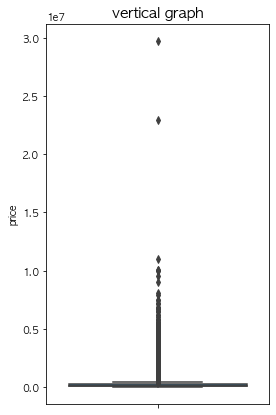

In [83]:
# boxplot 세로 그래프
plt.figure(figsize = (4, 7))
sns.boxplot(y = 'price', data = user_sales)
plt.title('vertical graph', size = 15)
plt.show()

**소수 유저의 구매 금액이 이상치 급으로 큰 것을 확인**

In [85]:
#4 Quantile
num = user_sales['price']
Q1 = num.quantile(.25)
Q3 = num.quantile(.75)
IQR = Q3 - Q1
Q2 = num.quantile(.5)
Q4 = num.quantile(1)

print('Q1: ', Q1)
print('Q2: ', Q2)
print('Q3: ', Q3)
print('Q4: ', Q4)

Q1:  49000.0
Q2:  100499.5
Q3:  216500.0
Q4:  29726100.0


In [117]:
#vip 분류
#vvip : 상위 0.25 ,vip : 상위 0.25 ~ 0.5, 일반 : 상위 0.5~
if user_sales['price'] > Q3 :
    user_sales['등급'] = 'VVIP'
elif user_sales['price'] > Q2 :
    user_sales['등급'] = 'VIP'
else:
    user_sales['등급'] = '일반'

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
#클러스터링 - 나이,성별 없는 유저 날리고 
#나이, 성별, session수, ,카테고리 1, 구매금액, 구매횟수로 클러스터링

In [36]:
print('생일 없는 유저 : ', df['birth_date'].isnull().sum())
print('성별 없는 유저 : ', df['gender'].isnull().sum())

생일 없는 유저 :  335636
성별 없는 유저 :  664253


In [42]:
print('전체 유저 수 :',df['user_no'].count())

전체 유저 수 : 5880407


In [77]:
#df2 = 개인정보 없는 유저 날린df 
df2 = df.dropna(axis=0, subset=['birth_date'])
df2 = df2.dropna(axis=0, subset=['gender'])

In [67]:
print('생일 없는 유저 : ', df2['birth_date'].isnull().sum())
print('성별 없는 유저 : ', df2['gender'].isnull().sum())

생일 없는 유저 :  0
성별 없는 유저 :  0


In [69]:
df2.head()

,session_id,event_timestamp,event_name,user_no,item_no,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,item_name,image_name,price,category1_code,category1_name,category2_code,category2_name,category3_code,category3_name,brand_no,brand_name,birth_date,gender
0,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:01.845000,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
1,c47e93742387750baba2e238558fa12d,2021-06-03 13:00:47.511013,click_item,+9eODQMZ8YgXQZJJAo56nw==,seELIO8ssL85o/yMQpkKNw==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 코튼 이지 쇼츠,13551f740ecacbcce3baf5e232f0fb9b,19900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
2,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:21.636026,click_item,+9eODQMZ8YgXQZJJAo56nw==,AQNsEUBqxMy99Mk6odfWTA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 치노 밴딩 팬츠,569712813f195e07974c740aeb70f7b2,39900.00,243100100,의류,243104100,하의,243104101,바지,13901.00,TOPTEN,1969-04-05,F
3,c47e93742387750baba2e238558fa12d,2021-06-03 13:02:58.306042,click_item,+9eODQMZ8YgXQZJJAo56nw==,DfYgpxfLCWwF+gyEmAjGkA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,남성) 쿨터치 사이드밴드 슬랙스,54df4e65f4b1dfe66273203fbd3c8d23,49900.00,243100100,의류,243102100,상의,243102103,티셔츠,13901.00,TOPTEN,1969-04-05,F
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,2021-06-10 12:15:42.476001,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,1/60mbjEzf3sI/52/d9lQA==,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,[Laslow] SeasonUnit Sigma F (남여공용),3cd917571a5f2a26eb01587d0276227a,65000.00,244100100,잡화,244101100,신발,244101112,슬리퍼,11481.00,LASLOW,1969-04-05,F


In [78]:
df2 = df2[['session_id', 'event_name', 'user_no', 'gender', 'birth_date', 'category1_name', 'brand_name', 'item_name', 'price']]

In [79]:
df2.head()

,session_id,event_name,user_no,gender,birth_date,category1_name,brand_name,item_name,price
0,c47e93742387750baba2e238558fa12d,click_item,+9eODQMZ8YgXQZJJAo56nw==,F,1969-04-05,의류,TOPTEN,남성) 코튼 리넨 이지 쇼츠,29900.00
1,c47e93742387750baba2e238558fa12d,click_item,+9eODQMZ8YgXQZJJAo56nw==,F,1969-04-05,의류,TOPTEN,남성) 코튼 이지 쇼츠,19900.00
2,c47e93742387750baba2e238558fa12d,click_item,+9eODQMZ8YgXQZJJAo56nw==,F,1969-04-05,의류,TOPTEN,남성) 치노 밴딩 팬츠,39900.00
3,c47e93742387750baba2e238558fa12d,click_item,+9eODQMZ8YgXQZJJAo56nw==,F,1969-04-05,의류,TOPTEN,남성) 쿨터치 사이드밴드 슬랙스,49900.00
4,f1b035b71ef5f8e1e7c1d6c0c5032faa,add_to_cart,+9eODQMZ8YgXQZJJAo56nw==,F,1969-04-05,잡화,LASLOW,[Laslow] SeasonUnit Sigma F (남여공용),65000.00
